# Материалы
* [Презентация](https://disk.yandex.ru/i/hCZRVc5BILGqIA) 
* [Дашборд](https://public.tableau.com/app/profile/liliya5413/viz/E-commerce_16591737906080/Dashboard1)

# E-commerce — Выявление профилей потребления
### Задача:

Сегментировать покупателей по профилю потребления

- Проведите исследовательский анализ данных
- Сегментируйте покупателей на основе истории их покупок

Как сегментация может помочь в разработке более персонализированных предложений для покупателей?
Попробуйте сформировать сегменты на основе того, что покупают пользователи. Для этого вы можете проанализировать их покупки и сегментировать товары на основе принадлежности к той или иной товарной категории.
- Сформулируйте и проверьте статистические гипотезы

### **Описание данных:**

Датасет описывает транзакции интернет-магазина товаров для дома и быта «Пока все ещё тут».

Колонки в  *ecommerce_dataset.csv* :

- `date` — дата заказа;
- `customer_id` — идентификатор покупателя;
- `order_id` — идентификатор заказа;
- `product` — наименование товара;
- `quantity` — количество товара в заказе;
- `price` — цена товара.

## Декомпозиция 

### Предобработка данных
- Оформление столбцов (тип написания, ширина столбцов, вывод длины строк)
- Проверка на пропуски 
- Проверка дубликатов
- Заполнение или удаление пропусков (если необходимо)
- Удаление дубликатов
- Преобразование типов данных (если необходимо)
- Проработка выбросов

### Исследовательский анализ
- Категоризация товаров. Разбивка продукции по категориям.
- даты совершения покупки. Выделить месяцы покупок


### Построить модель прогнозирования покупок
С помощью дерева разбить на кластеры (количественные значения по покупке -по столбцам price, quantity и т.д). K-means провести кластеризацию.
На графиках посмотреть зависимости.

#### Сегментация покупателей на основе:
- категории товаров

- сезонности (по месяцам)

- по сумме заказа. Посмотреть прибыльность

### Проверить гипотезы 
    - 1- `между кластерами есть статистическая значимая разница по количеству товара`
    - 2- `между кластерами есть статистическая значимая разница по общей стоимости`

## Загрузка библиотек

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly.express as px
from plotly import graph_objects as go

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy import stats as st

## Загрузка файла

In [2]:
try:
    # Открыли файл https://docs.google.com/spreadsheets/d/1ew-6mVtQ8lbh3EZg3eE63dHyWV_-iMOtFSFxyzoUd64/edit#gid=1270656379
    url = 'https://docs.google.com/spreadsheets/d/1ew-6mVtQ8lbh3EZg3eE63dHyWV_-iMOtFSFxyzoUd64/edit?usp=sharing'
    url.split('/')
    id = url.split('/')[5]
    df = pd.read_csv(f'https://docs.google.com/spreadsheets/d/{id}/export?format=csv')
    display(df.head())
except:
    df= pd.read_csv('D:\IT\courses Python\yandex_practicum\\12_last_project\ecommerce_dataset.csv')

    
df.info()
print('----------------------')
print('Количество дубликатов:', df.duplicated().sum())
print('----------------------')
print('Количество уникальных имен:\n', df.nunique())

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         6737 non-null   int64  
 1   customer_id  6737 non-null   object 
 2   order_id     6737 non-null   int64  
 3   product      6737 non-null   object 
 4   quantity     6737 non-null   int64  
 5   price        6737 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB
----------------------
Количество дубликатов: 0
----------------------
Количество уникальных имен:
 date           2606
customer_id    2451
order_id       2784
product        2343
quantity         49
price           360
dtype: int64


## Предобработка данных

In [3]:
# Установим максимальную ширину столбца = 100
pd.options.display.max_colwidth = 100

#Привели тип данных даты с оключением контроля формата
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d', exact=False)

#Проверили количество дубликатов удалением столбца date
df_drop= df.drop('date', axis=1)
display(df_drop.head(2))
print(f'Количество дубликатов: {df_drop.duplicated().sum()}, \
что составляет {round(df_drop.duplicated().sum() / len(df) *100, 1)}%')

,customer_id,order_id,product,quantity,price
0,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0


Количество дубликатов: 1864, что составляет 27.7%


In [4]:
# Посмотрим дубликаты с учетом только 'customer_id', 'order_id', 'product'
display(df[df.duplicated(subset=['customer_id', 'order_id', 'product'])]\
        .sort_values(by=['order_id', 'product'], ascending=False).tail(6))

# Оставим последную запись, остальное удалим
df.drop_duplicates(subset=['customer_id', 'order_id', 'product'], keep='last', inplace=True)

print(f'Количество дубликатов: \n{df[df.duplicated()].sum()}\n')
print('----------------------')
df.info()
print('----------------------')
print('\n Количество уникальных имен:\n', df.nunique())
df.tail(3)

,date,customer_id,order_id,product,quantity,price
376,2018-10-23,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Лаванды в кассете по 6 шт,1,315.0
509,2018-10-28,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Лаванды в кассете по 6 шт,1,315.0
588,2018-11-02,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Лаванды в кассете по 6 шт,1,315.0
758,2018-11-10,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Лаванды в кассете по 6 шт,1,315.0
816,2018-11-15,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Лаванды в кассете по 6 шт,1,315.0
827,2018-11-16,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Лаванды в кассете по 6 шт,1,315.0


Количество дубликатов: 
customer_id    0.0
order_id       0.0
product        0.0
quantity       0.0
price          0.0
dtype: float64

----------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4851 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         4851 non-null   datetime64[ns]
 1   customer_id  4851 non-null   object        
 2   order_id     4851 non-null   int64         
 3   product      4851 non-null   object        
 4   quantity     4851 non-null   int64         
 5   price        4851 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 265.3+ KB
----------------------

 Количество уникальных имен:
 date            393
customer_id    2451
order_id       2784
product        2343
quantity         49
price           360
dtype: int64


C:\Users\nikit\AppData\Local\Temp\ipykernel_2692\2251236081.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(f'Количество дубликатов: \n{df[df.duplicated()].sum()}\n')


,date,customer_id,order_id,product,quantity,price
6734,2019-10-31,25df96a7-c453-4708-9cea-a3dfc7c342ea,73162,"Герань домашняя (пеларгония зональная) цветущая D12, H25-30, малиновая с красным, полумахровая",1,157.0
6735,2019-10-31,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73164,"Таз пластмассовый со стиральной доской (Иж), 1404021",1,397.0
6736,2019-10-31,344aa778-e436-419e-a9c6-9b8f37b7c1df,73137,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1087.0


In [5]:
# Посмотрим характеристики данных.
df.describe()

,order_id,quantity,price
count,4851.000000,4851.000000,4851.000000
mean,48267.589981,2.835910,516.092971
std,27333.809628,17.642155,946.085142
min,12624.000000,1.000000,9.000000
25%,14774.000000,1.000000,90.000000
50%,68860.000000,1.000000,150.000000
75%,70835.500000,1.000000,502.000000
max,73164.000000,1000.000000,14917.000000


**`В количестве товаров в заказе есть выбросы`**

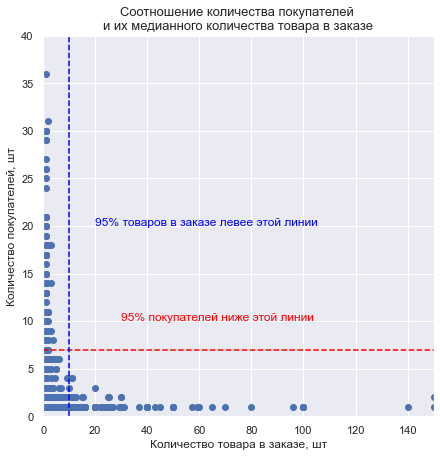

In [6]:
# Посмотрим соотношение покупателей и количество заказов
df_quantity = (
    df.groupby('customer_id')
    .agg({'customer_id': 'count', 'quantity': 'median'})
    .rename(columns={'customer_id': 'id_count'})
    .reset_index()
)
df_quantity.head(2)

plt.figure(figsize=(7,7))
plt.scatter(df_quantity['quantity'], df_quantity['id_count'])
plt.xlabel('Количество товара в заказе, шт')
plt.ylabel('Количество покупателей, шт')
plt.title('Соотношение количества покупателей \nи их медианного количества товара в заказе', fontsize=13)
plt.axhline(np.percentile(df_quantity['id_count'], 95), linestyle='--', color='red')
plt.axvline(np.percentile(df_quantity['quantity'], 95), linestyle='--', color='blue')
plt.text(30,10, '95% покупателей ниже этой линии', color='red')
plt.text(20,20, '95% товаров в заказе левее этой линии', color='blue')
plt.axis([0, 150, 0, 40])
plt.show()

Основные заказы с количеством товара (95%)- 10 шт, а основное количество покупателей (95%) - 7. Для анализа оставим заказы с количеством товара 20 шт.

In [7]:
df = df.loc[df['quantity'] <= 20].reset_index(drop=True)
df.info()
print('------------------------------------------------------')
print(f'Осталось {len(df)} данных, что составляет от очищенных {round(len(df) / 4851 *100, 1)}%,\
    удалили {round((100 - len(df) / 4851 *100), 1)}%')
print('------------------------------------------------------')
print('\n Количество уникальных имен:\n', df.nunique())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4769 entries, 0 to 4768
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         4769 non-null   datetime64[ns]
 1   customer_id  4769 non-null   object        
 2   order_id     4769 non-null   int64         
 3   product      4769 non-null   object        
 4   quantity     4769 non-null   int64         
 5   price        4769 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 223.7+ KB
------------------------------------------------------
Осталось 4769 данных, что составляет от очищенных 98.3%,    удалили 1.7%
------------------------------------------------------

 Количество уникальных имен:
 date            393
customer_id    2385
order_id       2713
product        2308
quantity         19
price           347
dtype: int64


,order_id,quantity,price
count,4769.000000,4769.000000,4769.000000
mean,47893.978822,1.716502,523.129377
std,27405.109835,2.251245,952.236938
min,12624.000000,1.000000,9.000000
25%,14770.000000,1.000000,97.000000
50%,68844.000000,1.000000,150.000000
75%,70799.000000,1.000000,524.000000
max,73164.000000,20.000000,14917.000000


In [8]:
# Проверим наличие заказов, совершенных более чем одним покупателем.
df_abnormal_orders = (
    df.groupby('order_id', as_index=False)['customer_id'].count()
    .sort_values(by='customer_id', ascending=False)
    .query('customer_id != 1')
)
df_abnormal_orders.head()

,order_id,customer_id
136,14698,51
144,14715,36
129,14688,31
163,14753,30
140,14705,29


`424 заказа совершено более чем 1 покупателем`. 
Могли руками номер заказа поменять или слили две разные базы, где нумерация шла независимо, а может еще как-то. Эты данные надо однозначно удалять, т.к. это противоречит логике продаж - у одного покупателя может быть много заказов но не может быть много покупателей у одного заказа.

In [9]:
# Удалим аномальные заказы-покупатели.
df = (pd.merge(df, df_abnormal_orders, on='order_id', how='outer', indicator=True)
      .query("_merge != 'both'")
      .drop(['_merge', 'customer_id_y'], axis=1)
      .reset_index(drop=True)
      .rename(columns={'customer_id_x': 'customer_id'})
     )
# Проверяем, не остались ли аномальных данных.
(df.groupby('order_id', as_index=False)['customer_id'].count()
 .sort_values(by='customer_id', ascending=False)
 .query('customer_id != 1'))

,order_id,customer_id


In [10]:
# Найдем общую стоимость заказа
df['total_price'] = df['price'] * df['quantity']

# Посмотрим, остались ли покупатели с аномальным количеством заказов
df_customer_order = df.groupby('customer_id', as_index=False)['order_id'].count().sort_values(by='order_id')
df_customer_order.tail()
df = df.query('customer_id != "c971fb21-d54c-4134-938f-16b62ee86d3b"')

# Содадим списки аномальных данных
abnormal_orders = df_customer_order[df_customer_order['order_id'] > np.percentile(df_customer_order['order_id'], 99)].index.to_list()
abnormal_total_price = df[df['total_price'] > np.percentile(df['total_price'], 99)].index.to_list()
abnormal_customers = pd.concat([pd.Series(abnormal_orders), pd.Series(abnormal_total_price)]).to_list()

#Удалим выбросы
df = df.query('customer_id != @abnormal_customers and total_price != @abnormal_total_price and order_id != @abnormal_orders')
display(df.sample(n=3, weights='quantity'))
df.info()
print('------------------------------------------------------')
print(f'Осталось {len(df)} данных, что составляет от очищенных {round(len(df) / 4769 *100, 1)}%,\
 удалили {round((100 - len(df) / 4769 *100), 1)}%')

,date,customer_id,order_id,product,quantity,price,total_price
1132,2019-03-23,e4c28c40-6e1c-4eff-a619-f468aff914ff,70845,Тарелка обеденная КОТОН ФЛАУЭР 25 см H2776 Luminarc,6,92.0,552.0
1813,2019-08-06,a0ce9b81-dad7-48f6-a28a-bb671c05166f,72220,Чайная ложка TRENDY сталь 2 мм 3 шт Attribute ACT033,7,172.0,1204.0
1864,2019-08-17,648a9e74-c254-45f4-9f80-f551dbe6fe22,72323,"Бидон пластмассовый 5,0 л (Иж) 1401119",2,142.0,284.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2160 entries, 0 to 2288
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         2160 non-null   datetime64[ns]
 1   customer_id  2160 non-null   object        
 2   order_id     2160 non-null   int64         
 3   product      2160 non-null   object        
 4   quantity     2160 non-null   int64         
 5   price        2160 non-null   float64       
 6   total_price  2160 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 135.0+ KB
------------------------------------------------------
Осталось 2160 данных, что составляет от очищенных 45.3%, удалили 54.7%


### Вывод
- оформление столбцов соответствует. Увеличила ширину, чтобы все данные влезали,
- дата приведена в соответствующий формат,
- пропусков нет,
- дубликаты выявлены после игнорирования столбца даты. Удалены, оставлены только последние записи.
- Количество уникальных имен продуктов, заказов и покупателей осталось неизменным после удаления дубликатов.
- Убрали заказы, которые сделали больше одного покупателя.
- Добавила общую стоимость заказа
- Убрали выбросы по количеству товаров, общей стоимости, по покупателям. 

## Исследовательский анализ
### Сегментация покупок по категориям

In [11]:
# Применить дополнительную настройку, которая позволяет выводить бесконечное количество строк
#pd.set_option('display.max_rows', None)

# Посмотрим покупки. Приведем к строчным буквам
df['product'] = df['product'].str.lower()
df['product'].sample(5)

1637                         ваза маскарад 24 см g5541 luminarc франция
1898    крышка оцинкованная для стерилизации банок (на 3 банки) 1514008
579                   чайник эмалированный со свистком 2,5л ем-25001/17
2114           коробка для хранения бамбук 30х40х25 см attribute asb425
1820              пеларгония розебудная red pandora укорененный черенок
Name: product, dtype: object

In [12]:
# Для сегментации товаров из истории покупок, выделим списки
# Растения
plant = ['растение', 'рассада', 'герань', 'пеларгония', 'радермахера', 'хризолидокарпус', 'юкка', 'шеффлера', 
         'суккулент', 'эхеверия', 'кампанула', 'хлорофитум', 'цикламен', 'глоксиния', 'азалия', 'альбука',
         'гортензия', 'хризантема', 'иссоп', 'сантолина', 'роза', 'душица','гербера', 'мелисса', 'калоцефалус',
         'аспарагус', 'молодило', 'фиалка', 'каллуна', 'капсикум', 'мирт', 'афеляндра', 'антуриум', 'розмарин',
         'бальзамин', 'артемизия', 'лаванда', 'мята', 'каланхое', 'циперус', 'эвкалипт', 'адиантум', 'калатея',
         'нолина', 'кориандр', 'бегония', 'крассула', 'примула', 'дендробиум', 'мимоза', 'соланум', 'бархатцы',
         'космея', 'морковь', 'настурция', 'огурец', 'алиссум', 'петуния', 'гвоздика', 'годеция', 'капуста',
         'календула', 'кореопсис', 'лапчатка', 'флокс', 'цинерария', 'эшшольция', 'фаленопсис', 'подсолнечник',
         'гиностемма', 'ель', 'кипарисовик', 'аптения', 'пуансет', 'скиммия', 'фиттония', 'тимьян', 'алоэ',
         'фикус', 'кодонанта', 'гимнокалициум', 'кофе', 'крокус', 'спатифиллум', 'гипсофила', 'тюльпан',
         'гиацинт', 'томат', 'калибрахоа', 'эпипремнум', 'аквилегия', 'базилик', 'горох', 'земляника', 'гардения',
         'незабудка', 'седум', 'укроп', 'нефролепис', 'калла', 'декабрист', 'чабер', 'ранункулус', 'эхин',
         'овсянница', 'георгина', 'смолевка', 'цинния', 'базилик', 'лавр', 'вербейник', 'котовник', 'колокольчик',
         'ясколка', 'виола', 'лилейник', 'папоротник', 'платикодон', 'энотера', 'вербена', 'фуксия', 'дыня',
         'цитрофортунелла', 'пеперомия', 'виноград', 'лобелия', 'мускари', 'пиретрум', 'лобелия', 'муррайя',
         'вероника', 'арбуз', 'баклажан', 'клубника', 'патиссон', 'джункус', 'драцена', 'фатсия', 'хоста',
         'гайлардия', 'монарда', 'ромашка', 'рудбекия', 'осина', 'сциндапсус', 'трав', 'астра', 'бузульник',
         'камнеломка', 'солидаго', 'физостегия', 'бадан', 'лен', 'барвинок', 'лантана', 'лаватера', 'анемона',
         'валериана', 'буддлея', 'змееголовник', 'любисток', 'петрушка', 'табак', 'шалфей', 'вигна', 'кабачок',
         'тыква', 'хамедорея', 'мединилла', 'импатиенс', 'замиокулькас', 'салат', 'амариллис', 'пахира', 'литопс']
# Товары для дома
household_goods = ['сушилка', 'таз', 'чехол', 'ешал', 'щетка-сметка', 'ерш', 'доск', 'прищеп', 'корзина', 
                   'дозатор', 'контейнер', 'подрукавник', 'сверел', 'сверло-фреза', 'веник', 'вешалка-плечики',
                   'кувшин', 'перчатки', 'стремянк', 'лестница-стремянка', 'для ванн', 'туалет', 'плечики', 
                   'сиденье', 'холодная сварка', 'шнур резиновый', 'угольник', 'линейка', 'швабра', 'урна',
                   'короб стеллажный', 'ножеточка', 'насадка', 'сметка с совком', 'петля-стрела', 'стяжка',
                   'подголовник', 'вешалка-стойка', 'щетка', 'ведро', 'губка', 'фен', 'ролик', 'термометр',
                   'ящик', 'шило', 'сетка', 'мыльница', 'инструмент', 'петля', 'кольца', 'вантуз', 'крепеж',
                   'фал', 'штангенциркуль', 'напильник', 'ёрш', 'отжим', 'фиксатор', 'сверло', 'шпагат', 
                   'окномойка', 'ванна', 'шнур', 'мешок', 'решетка', 'пакет', 'тряпка', 'совок', 'основание']
# Декор
decor = ['муляж', 'плед', 'скатерть', 'простыня', 'штора', 'подушка', 'полотенце', 'салфетка', 'кофр', 'светильник', 
         'кашпо', 'карниз', 'ящик для хранения', 'ковёр', 'коврик', 'коробка', 'халат', 'полотенце', 'наматра',
         'наматрицник-чехол', 'искусственн', 'салфет', 'ковер', 'полк', 'крючок', 'искуственн', 'ткань',
         'полотенец', 'комод', 'покрывало', 'подставка', 'одеяло', 'новогодн', 'фоторамка', 'этажерка', 'ключница',
         'хлебница', 'обувниц', 'пододеяльник', 'наволочка', 'стеллаж', 'пуф']
# Сумки
bag = ['сумка', 'сумка-тележка', 'тележка', 'для тележки']
# Посуда и бытовая техника
dishes = ['тарелка', 'вилка', 'ложка', 'нож', 'котел', 'круж', 'фужер', 'толкушка', 'чайник', 'банка', 'противень', 
          'крышка', 'посуд', 'миксер', 'тepмокружка', 'сковорода', 'контейнер для овощей', 'масленка', 'утюг',
          'набор эмалированных салатников', 'терка', 'лопатка', 'стакан', 'мини-сковорода', 'корыто', 'рыбочистка',
          'овощеварка', 'салатник', 'салфетница', 'овощечистка', 'лоток', 'мантоварка', 'бокал', 'ковш', 'кисточка',
          'скребок', 'картофелемялка', 'рассекатель', 'набор форм', 'весы', 'миска', 'пресс', 'набор столов', 'термос',
          'электроштопор', 'чайный набор', 'бульонница', 'для соус', 'кастрюля', 'свч', 'блюдце', 'пылесос', 'для выпеч',
          'орехоколка', 'сито', 'скалка', 'венчик', 'тортница', 'блюдо', 'сотейник', 'бидон', 'сахарница', 'соков',
          'пьезозажигалка', 'кипятильник', 'половник']
# Бытовая химия
household_chemicals = ['стиральный', 'крем', 'зубная паста', 'пена для ванн', 'средство для удаления', 'бензин', 
                        'паста', 'мыло', 'антижир', 'чистки', 'мытья пол', 'гель', 'маска', 'антизасор']
# Функция присваивания категории к товару
# Для поиска в сортировке 
df['category'] = 0
def categorizer(name_list, word):
    list = '|'.join(name_list)
    df.loc[df['product'].str.contains(list, regex=True), 'category'] = word

categorizer(plant, 'растение')
categorizer(household_goods, 'товары для дома')
categorizer(decor, 'декор')
categorizer(bag, 'сумки')
categorizer(dishes, 'посуда и бытовая техника')
categorizer(household_chemicals, 'бытовая химия')
df.head()

,date,customer_id,order_id,product,quantity,price,total_price,category
0,2018-10-01,375e0724-f033-4c76-b579-84969cf38ee2,68479,настенная сушилка для белья gimi brio super 100,1,824.0,824.0,товары для дома
1,2018-10-01,6644e5b4-9934-4863-9778-aaa125207701,68478,"таз пластмассовый 21,0 л круглый ""водолей"" с614, 1404056",1,269.0,269.0,товары для дома
3,2018-10-01,161e1b98-45ba-4b4e-8236-e6e3e70f6f7c,68483,"вешалка для брюк металлическая с резиновым покрытием 26 см цвет: синяя, attribute, ahs331",10,82.0,820.0,товары для дома
4,2018-10-01,86432d8d-b706-463b-bd5d-6a9e170daee3,68484,"сушилка для белья потолочная zalger lift basic 1520 200 см, 10 м",1,614.0,614.0,товары для дома
5,2018-10-01,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68485,чехол eurogold clean basic хлопок для досок 120х38-120х42 см c42,1,187.0,187.0,товары для дома


In [13]:
# Удалим продукты, они нам больше не пригодятся
df.drop('product', axis=1, inplace=True)
# Проверяем, есть ли еще продукты без категории
df.query('category == 0')

,date,customer_id,order_id,quantity,price,total_price,category


Все товары получили категорию.
### Какие категории лучше всего продаются

In [14]:
df_price = (df
      .pivot_table(index='category', values='total_price', aggfunc='sum')
      .sort_values(by='total_price', ascending=False)
      .reset_index())
#display(df_product)
fig = px.bar(df_price, y='category', x='total_price', width=900, height=500, color='category', 
            color_discrete_sequence=px.colors.qualitative.G10, text='total_price')
fig.update_layout(title='Сумма продаж в категориях', title_x=0.5,
                  xaxis_title ='Сумма продаж, у.е.', yaxis_title='Категории',
                 legend_title='Обозначение категорий')
fig.show()

print('По сумме продаж лидирует категория - "{}" на {} у.е., на втором месте- "{}" на {} у.е., минимум у категории "{}" на {} у.е.'
      .format(df_price.iloc[0]['category'], df_price['total_price'].max(), 
              df_price.iloc[1]['category'], df_price.iloc[1]['total_price'],
              df_price.iloc[5]['category'], df_price['total_price'].min(),))

По сумме продаж лидирует категория - "товары для дома" на 919143.0 у.е., на втором месте- "сумки" на 599412.0 у.е., минимум у категории "бытовая химия" на 23982.0 у.е.


In [15]:
# Посмотрим по чуслу проданных продуктов в категориях
df_quantity = df.pivot_table(index='category', values='quantity', aggfunc='sum').sort_values(by='quantity', ascending=False).reset_index()
#display(df_product)
fig = px.bar(df_quantity, y='category', x='quantity', width=900, height=500, color='category', 
            color_discrete_sequence=px.colors.qualitative.G10, text='quantity')
fig.update_layout(title='Количество продаж в категориях', title_x=0.5,
                  xaxis_title ='Количество продаж, шт.', yaxis_title='Категории',
                 legend_title='Обозначение категорий')
fig.show()
print('По количеству продаж лидирует категория - "{}" на {} шт., на втором месте- "{}" на {} шт., минимум у категории "{}" на {} шт.'
      .format(df_quantity.iloc[0]['category'], df_quantity['quantity'].max(), 
              df_quantity.iloc[1]['category'], df_quantity.iloc[1]['quantity'],
              df_quantity.iloc[5]['category'], df_quantity['quantity'].min(),))

По количеству продаж лидирует категория - "декор" на 1381 шт., на втором месте- "товары для дома" на 1263 шт., минимум у категории "бытовая химия" на 76 шт.


### Вывод
- разделили товары на категории
- По сумме продаж лидирует категория - "товары для дома" на 919143.0 у.е., на втором месте- "сумки" на 599412.0 у.е., минимум у категории "бытовая химия" на 23982.0 у.е.
- По количеству продаж лидирует категория - "декор" на 1381 шт., на втором месте- "товары для дома" на 1263 шт., минимум у категории "бытовая химия" на 76 шт.

### Сегментация по времени покупок


In [16]:
print('Минимальная дата выгрузки:', df['date'].min())
print('Максимальная дата выгрузки:', df['date'].max())
print('За какой период данными распологаем?', (df['date'].max()-df['date'].min()))
#Выделим по месяцам
df['month'] = df['date'].dt.strftime('%Y-%m')
df['month'].sample(2)

Минимальная дата выгрузки: 2018-10-01 00:00:00
Максимальная дата выгрузки: 2019-10-31 00:00:00
За какой период данными распологаем? 395 days 00:00:00


1567    2019-06
1192    2019-04
Name: month, dtype: object


## Построить модель прогнозирования покупок
С помощью дерева разбить на кластеры (количественные значения по покупке -по столбцам price, quantity и т.д), провести K-means кластеризацию. На графиках посмотреть зависимости.

### Сегментируем покупателей по покупкам

In [17]:
# Выделим данные по заказам
df_orders = (
    df
    .groupby('order_id', as_index=False)
    .agg({'total_price': 'sum'})
    .rename({'total_price': 'final_sum'}, axis=1)
)
display(df_orders.head(2))

# Количество заказов на покупателя
orders_count = (
    df.groupby('customer_id', as_index=False)['order_id'].count()
    .rename({'order_id': 'orders_count'}, axis=1)
)
orders_count.head(2)

,order_id,final_sum
0,14510,573.0
1,14538,90.0


,customer_id,orders_count
0,001cee7f-0b29-4716-b202-0042213ab038,1
1,002d4d3a-4a59-406b-86ec-c3314357e498,1


In [18]:
# Все объединим и найдем общую сумму
df_customer = (
    df[['customer_id', 'order_id', 'price', 'quantity']]
    .merge(df_orders, how='left', on='order_id')
    .merge(orders_count, how='left', on='customer_id')
    .query('customer_id not in @abnormal_customers')
    .drop('order_id', axis=1)
)
df_customer['revenue'] = df_customer['final_sum'] * df_customer['orders_count']
df_customer.head(2)

,customer_id,price,quantity,final_sum,orders_count,revenue
0,375e0724-f033-4c76-b579-84969cf38ee2,824.0,1,824.0,1,824.0
1,6644e5b4-9934-4863-9778-aaa125207701,269.0,1,269.0,1,269.0


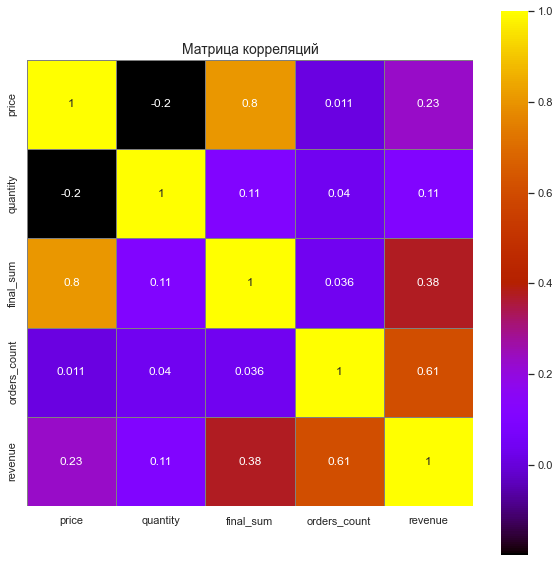

In [19]:
#Постройте матрицу корреляций и отобразите её.
plt.figure(figsize=(10,10))
sns.heatmap(data = df_customer.corr(), annot=True, square=True, linewidths=.5, linecolor='gray', cmap='gnuplot') #fmt='.1%'
plt.title('Матрица корреляций', fontsize=14)
plt.show()

На 80% видна зависимость price от final_sum. Думаю из-за того, что большинство заказов единичны. 

Можно проводить кластеризацию покупателей с использованием машинного обучения. Предварительно построим дендрограмму и выберем оптимальное число кластеров

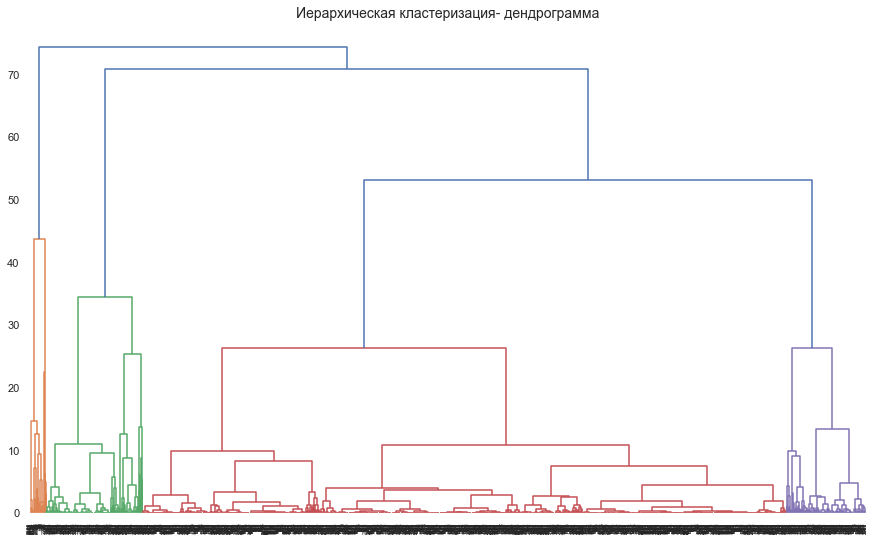

In [20]:
#Стандартизируйте данные.
sc = StandardScaler()
X_sc = sc.fit_transform(df_customer.drop(columns='customer_id'))

#Постройте матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуйте дендрограмму
linked = linkage(X_sc, method = 'ward')
plt.figure(figsize=(15, 9))  
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация- дендрограмма', fontsize=14)
plt.show()

Видно 4 кластера. 

In [21]:
km = KMeans(n_clusters = 4, random_state = 0)
labels = km.fit_predict(X_sc)
df_customer['cluster_km'] = labels
display(df_customer.tail(2))
round(df_customer.groupby('cluster_km').mean(), 1).T

,customer_id,price,quantity,final_sum,orders_count,revenue,cluster_km
2158,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,397.0,1,397.0,17,6749.0,2
2159,344aa778-e436-419e-a9c6-9b8f37b7c1df,1087.0,1,1087.0,1,1087.0,0


cluster_km,0,1,2,3
price,580.7,3725.5,1056.9,110.0
quantity,1.4,1.4,2.5,11.7
final_sum,655.2,4348.1,1455.5,1277.7
orders_count,1.1,1.1,23.1,1.2
revenue,724.7,5144.7,34442.5,1386.6


По средним значениям:
- **0 кластер:**
    * цена -580.7,
    * количество товара - 1.4,
    * количество заказов - 1,
    * выручка - 724.7
- **1 кластер:**
    * цена товара максимальная - 3725.5,
    * количество товара - 1.4,
    * количество заказов - 1,
    * выручка - 5144.7
- **2 кластер:**
    * цена - 1056.9,
    * количество товара - 2.5,
    * количество заказов - 23,
    * выручка - 34442.5
- **3 кластер:**
    * минимальная цена товара - 110,
    * количество товара - 11.7,
    * количество заказов - 1.2,
    * выручка - 1386.6

In [22]:
df = df.merge(df_customer[['customer_id', 'cluster_km', 'revenue']] , how='left', on='customer_id')
df.head(2)

,date,customer_id,order_id,quantity,price,total_price,category,month,cluster_km,revenue
0,2018-10-01,375e0724-f033-4c76-b579-84969cf38ee2,68479,1,824.0,824.0,товары для дома,2018-10,0,824.0
1,2018-10-01,6644e5b4-9934-4863-9778-aaa125207701,68478,1,269.0,269.0,товары для дома,2018-10,0,269.0


### Сегментация покупателей по категориям товаров

In [23]:
#Посмотрим распределение общие суммы покупок в кластерах в каждой категории
def clusterer_category_profit(cluster):
        data = (df.query('cluster_km == @cluster')
            .groupby('category')
            .agg({'revenue': 'sum'})
            .reset_index())
        print(f'\nВ КЛАСТЕРЕ "{cluster}"')
        fig = px.bar(data, y='category', x='revenue', color_discrete_sequence=px.colors.qualitative.G10,
             color='revenue', width=700, height=400, text='revenue')
        fig.update_layout(title='Общие суммы покупок по категориям', title_x=0.5,
                  xaxis_title ='Сумма покупок, у.е.', yaxis_title='Категории')
        fig.show()
        print('У кластера "{}" по общей сумме покупок лидирует категория - "{}" на {} у.е., убыточная категория "{}" на {} у.е.'
                  .format(cluster, data.iloc[data['revenue'].idxmax()]['category'], data['revenue'].max(), 
                          data.iloc[data['revenue'].idxmin()]['category'], data['revenue'].min(),))
        print('------------------------------------------------------\n')

clusterer_category_profit(0)
clusterer_category_profit(1)
clusterer_category_profit(2)
clusterer_category_profit(3)


В КЛАСТЕРЕ "0"


У кластера "0" по общей сумме покупок лидирует категория - "товары для дома" на 575391.0 у.е., убыточная категория "бытовая химия" на 11364.0 у.е.
------------------------------------------------------


В КЛАСТЕРЕ "1"


У кластера "1" по общей сумме покупок лидирует категория - "сумки" на 582047.0 у.е., убыточная категория "бытовая химия" на 9894.0 у.е.
------------------------------------------------------


В КЛАСТЕРЕ "2"


У кластера "2" по общей сумме покупок лидирует категория - "товары для дома" на 21342424.0 у.е., убыточная категория "растение" на 1515470.0 у.е.
------------------------------------------------------


В КЛАСТЕРЕ "3"


У кластера "3" по общей сумме покупок лидирует категория - "товары для дома" на 76617.0 у.е., убыточная категория "бытовая химия" на 2724.0 у.е.
------------------------------------------------------



### Сегментация покупателей по сезонности (по месяцам)

In [24]:
#Посмотрим распределение количества покупок по месяцам в каждом кластере
def clusterer_month(cluster):
        data = (df.query('cluster_km == @cluster')
            .groupby('month')
            .agg({'revenue': 'sum'})
            .reset_index())
        print(f'\nВ КЛАСТЕРЕ "{cluster}"')
        fig = px.bar(data, y='month', x='revenue', color_discrete_sequence=px.colors.qualitative.G10,
             color='revenue', width=700, height=600, text='revenue')
        #fig.update_xaxes(tickangle=30)
        fig.update_layout(title='Общие суммы покупок по месяцам', title_x=0.5,
                  xaxis_title ='Cуммы покупок, у.е.', yaxis_title='Месяцы')
        fig.show()
        print('У кластера "{}" по общей сумме покупок лидирует месяц - "{}" на {} у.е., убыточный месяц "{}" на {} у.е.'
                  .format(cluster, data.iloc[data['revenue'].idxmax()]['month'], data['revenue'].max(), 
                          data.iloc[data['revenue'].idxmin()]['month'], data['revenue'].min(),))
        print('------------------------------------------------------\n')

clusterer_month(0)
clusterer_month(1)
clusterer_month(2)
clusterer_month(3)


В КЛАСТЕРЕ "0"


У кластера "0" по общей сумме покупок лидирует месяц - "2018-12" на 162565.0 у.е., убыточный месяц "2018-10" на 73744.0 у.е.
------------------------------------------------------


В КЛАСТЕРЕ "1"


У кластера "1" по общей сумме покупок лидирует месяц - "2019-04" на 456517.0 у.е., убыточный месяц "2019-01" на 42866.0 у.е.
------------------------------------------------------


В КЛАСТЕРЕ "2"


У кластера "2" по общей сумме покупок лидирует месяц - "2018-10" на 31112991.0 у.е., убыточный месяц "2019-10" на 6173329.0 у.е.
------------------------------------------------------


В КЛАСТЕРЕ "3"


У кластера "3" по общей сумме покупок лидирует месяц - "2019-02" на 29362.0 у.е., убыточный месяц "2019-08" на 3928.0 у.е.
------------------------------------------------------



## Проверка гипотез


### Первая гипотеза
Нулевая гипотеза: `между кластерами Есть статистическая значимая разница по количеству товара`

Альтернативная: `между кластерами Нет статистически значимой разницы по количеству товара`

In [25]:
# Применим непараметрический тест Уилкоксона-Манна-Уитни для проверки стат.значимости различия в размере групп по количеству товара
def test_cluster(cluster1, cluster2):
    results = st.mannwhitneyu(df_customer[df_customer['cluster_km']==cluster1]['quantity'], 
                              df_customer[df_customer['cluster_km']==cluster2]['quantity'])
    alpha = 0.05 # критический уровень статистической значимости
    #print('P-value:{0:.4f}'.format(results.pvalue))
    if results.pvalue < alpha:
        print(f'Между кластерами {cluster1} и {cluster2}, p-value: {results.pvalue.round(3)}- ЕСТЬ стат. значимая разница по количеству товара\n')
    else:
        print(f'Между кластерами {cluster1} и {cluster2}, p-value: {results.pvalue.round(3)}- НЕТ стат. значимой разницы- разбивка прошла НЕ корректно\n')
    print('')
test_cluster(0, 1)
test_cluster(0, 2)
test_cluster(0, 3)
test_cluster(1, 2)
test_cluster(1, 3)
test_cluster(2, 3)


Между кластерами 0 и 1, p-value: 0.027- ЕСТЬ стат. значимая разница по количеству товара


Между кластерами 0 и 2, p-value: 0.76- НЕТ стат. значимой разницы- разбивка прошла НЕ корректно


Между кластерами 0 и 3, p-value: 0.0- ЕСТЬ стат. значимая разница по количеству товара


Между кластерами 1 и 2, p-value: 0.199- НЕТ стат. значимой разницы- разбивка прошла НЕ корректно


Между кластерами 1 и 3, p-value: 0.0- ЕСТЬ стат. значимая разница по количеству товара


Между кластерами 2 и 3, p-value: 0.0- ЕСТЬ стат. значимая разница по количеству товара




По количеству товара, между кластерами 0-2 и 1-2 нет статистически значимой разницы- разбивка прошла не корректно.

### Гипотеза вторая
Нулевая гипотеза: `между кластерами Есть статистическая значимая разница по общей стоимости`

Альтернативная: `между кластерами Нет статистически значимой разницы по общей стоимости`

In [26]:
# Применим непараметрический тест Уилкоксона-Манна-Уитни для проверки стат.значимости различия в размере групп по общей стоимости
def test_cluster(cluster1, cluster2):
    results = st.mannwhitneyu(df_customer[df_customer['cluster_km']==cluster1]['revenue'], 
                              df_customer[df_customer['cluster_km']==cluster2]['revenue'])
    alpha = 0.05 # критический уровень статистической значимости
    if results.pvalue < alpha:
        print(f'Между кластерами {cluster1} и {cluster2}, p-value: {results.pvalue.round(3)}-  ЕСТЬ стат. значимая разница по общей стоимости\n')
    else:
        print(f'Между кластерами {cluster1} и {cluster2}, p-value: {results.pvalue.round(3)}-  НЕТ стат. значимой разницы- разбивка прошла НЕ корректно\n')
    print('')
test_cluster(0, 1)
test_cluster(0, 2)
test_cluster(0, 3)
test_cluster(1, 2)
test_cluster(1, 3)
test_cluster(2, 3)

Между кластерами 0 и 1, p-value: 0.0-  ЕСТЬ стат. значимая разница по общей стоимости


Между кластерами 0 и 2, p-value: 0.0-  ЕСТЬ стат. значимая разница по общей стоимости


Между кластерами 0 и 3, p-value: 0.0-  ЕСТЬ стат. значимая разница по общей стоимости


Между кластерами 1 и 2, p-value: 0.0-  ЕСТЬ стат. значимая разница по общей стоимости


Между кластерами 1 и 3, p-value: 0.0-  ЕСТЬ стат. значимая разница по общей стоимости


Между кластерами 2 и 3, p-value: 0.0-  ЕСТЬ стат. значимая разница по общей стоимости




При проверке размера групп по общей стоимости у всех есть статистическая значимая разница. Разбивка прошла корректно.

## Выводы по исследованию:

**1) Сегментация покупок**
- разделили товары на категории
- По сумме продаж лидирует категория - "товары для дома" на 919143.0 у.е., на втором месте- "сумки" на 599412.0 у.е., минимум у категории "бытовая химия" на 23982.0 у.е.
- По количеству продаж лидирует категория - "декор" на 1381 шт., на втором месте- "товары для дома" на 1263 шт., минимум у категории "бытовая химия" на 76 шт.

**2) Разбили покупателей по кластерам, средние значения данных:**
- 0 кластер:
    * цена -580.7,
    * количество товара - 1.4,
    * количество заказов - 1,
    * выручка - 724.7
- 1 кластер:
    * цена товара максимальная - 3725.5,
    * количество товара - 1.4,
    * количество заказов - 1,
    * выручка - 5144.7
- 2 кластер:
    * цена - 1056.9,
    * количество товара - 2.5,
    * количество заказов - 23,
    * выручка - 34442.5
- 3 кластер:
    * минимальная цена товара - 110,
    * количество товара - 11.7,
    * количество заказов - 1.2,
    * выручка - 1386.6

**3) Сегментация покупателей по кластерам**

По суммам покупок убыточная категория "бытовая химия" у всех кластеров. 

По общей сумме покупок:

    - У кластера "0" лидирует категория - "декор" и "товары для дома". Пик продаж в декабре 2018.
    - У кластера "1" лидирует категория - "товары для дома" и "сумки". Пик продаж в апреле.
    - У кластера "2" лидирует категория - "товары для дома" и "декор". Пик продаж в июле, октябре, январе.
    - У кластера "3" лидирует категория - "товары для дома" и "декор". Пик продаж в феврале.

**4) Проверили гипотезы:**

    - 1- По количеству товара, нулевая гипотеза не подтвердилась- между кластерами 0-2 и 1-2 нет статистически значимой разницы
    - 2- При проверке размера групп по общей стоимости, нулевая гипотеза подтвердилась-  у всех есть статистическая значимая разница. Разбивка прошла корректно.

**Рекомендации:**

- 1- `Группе клиентов кластера "0" и "2"` можно дать рекламу в сезонные празники для категорий "декор" и "посуда и бытовая техника", для увеличения продаж в этих категориях, не только в успешно продающем "товары для дома". 
- 2- `Группе клиентов кластера "1"`- "товары для дома", "сумки" и "декор" успешно продаются только в апреле. Рекомендуется давать периодическую рассылку раз в месяц для увеличения продаж в другие месяцы.
- 3- `Группе клиентов кластера "3"` "товары для дома" и "декор" хорошо продаются на праздники. Нужна реклама на сезонную распродажу. Эта группа предпочитает дешевую продукцию.
- 4- Как по суммам, так и по количеству продаж категория товаров- "бытовая химия"- самая не выгодная. 
Предлагаю удалить эти товары с продажи.

In [ ]:
# Для дашборда сохраним отредактированный файл.
df.to_csv('df.csv', sep='\t', encoding='utf-8', index=False)